In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import plotly.express as px


In [63]:
data = pd.read_csv('data/train.csv')

# Preprocessing

In [26]:
# Identify the input columns (a list of column names - not including ID or Sale Price)
input_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
# Identify the name of the target column (a single string, not a list)
target_col = 'SalePrice'

In [27]:
inputs = data[input_cols].copy()
targets = data[target_col]

In [55]:
categorical_cols = [var for var in data.columns if data[var].dtype == 'O']
numerical_cols = [var for var in data.columns if var not in categorical_cols and var != 'SalePrice']
# numcol1 = inputs.select_dtypes(include=['int64', 'float64']).columns.tolist()
# catcol2 = inputs.select_dtypes('object').columns.tolist()

# Distribution of Target Variable

In [29]:
px.histogram(data, x='SalePrice', title='Distribution of Sales Price')

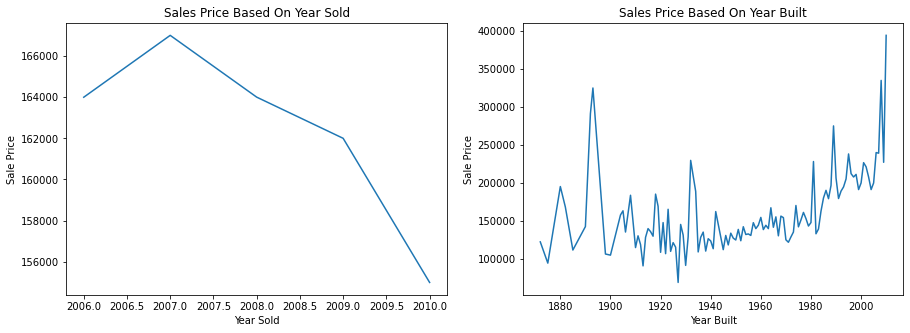

In [32]:
xdmd=data.groupby('YrSold')['SalePrice'].median()
xdmdb=data.groupby('YearBuilt')['SalePrice'].median()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(xdmd.index, xdmd)
axes[0].set_title('Sales Price Based On Year Sold')
axes[0].set_xlabel('Year Sold')
axes[0].set_ylabel('Sale Price')
axes[1].plot(xdmdb.index,xdmdb)
axes[1].set_title('Sales Price Based On Year Built')
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Sale Price');

<AxesSubplot:title={'center':'Log transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Count'>

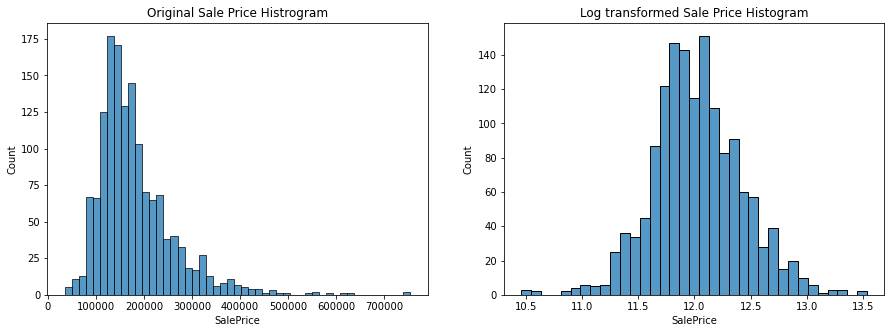

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
sns.histplot(data.SalePrice, ax = ax1)
ax1.set_title('Original Sale Price Histrogram')

ax2.set_title('Log transformed Sale Price Histogram')
log_salePrice = np.log1p(data['SalePrice'])
sns.histplot(log_salePrice)

# Missing Values

In [53]:
#list of variables with missing vriables
vars_missing = [var for var in data.columns if data[var].isnull().sum() > 0]
#determine percentage of missing valuables
data[vars_missing].isnull().mean().sort_values(ascending = False).head()

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

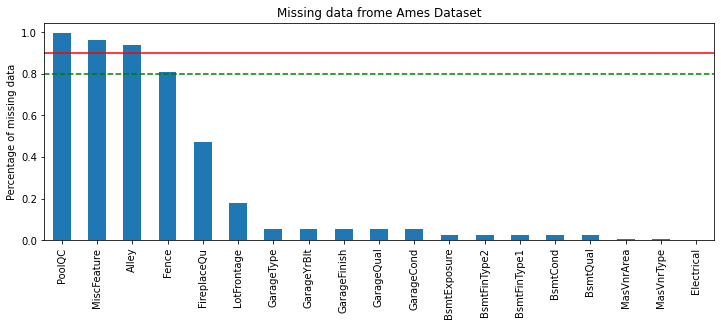

In [49]:
data[vars_missing].isnull().mean().sort_values(ascending = False).plot.bar(figsize = (12,4))
plt.ylabel('Percentage of missing data')
plt.title('Missing data frome Ames Dataset')
plt.axhline(0.9, color = 'red', linestyle = '-')
plt.axhline(0.8, color = 'green', linestyle = '--')

**What are the number of missing categorical and numerical data?**

In [59]:
categorical_na = [var for var in categorical_cols if var in vars_missing]
numerical_na = [var for var in numerical_cols if var in vars_missing]

print('Number of categorical variables with NA: ', len(categorical_na))
print('Number of numerical variables with NA: ', len(numerical_na))

Number of categorical variables with NA:  16
Number of numerical variables with NA:  3


**Dealing with numerical missing data**
- Temporal 
- Continuous
- Discrete

In [60]:
numerical_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']